# Importing Libraries

In [1]:
# Sequential API to create models
from keras.models import Sequential

# Components to create a model
from keras. layers import Dense, Input

# Stochastic Gradient Desent Algorithm
from keras.optimizers import SGD

# Keras already hosted MNIST dataset for us
from keras.datasets import mnist

# An Keras utility to binarize integers
from keras.utils import to_categorical

# An Keras utility to visualize model graph
from keras.utils import plot_model

# Another ML library that has many utilities for image operation
import skimage

# Here we will use only two of it's utilities
from skimage.io import imshow

# Another python library for plotting things
import matplotlib.pyplot as plt

# Another python library to manipulate vectors, matrices, arrays etc.
import numpy as np

# Tuning the hyperparameters

In [2]:
# Whole dataset splits into batches
batch_size = 128

# Number of labels of our dataset
nb_classes = 10

# Number of times we want to train the model
nb_epoch = 10

# Load MNIST dataset
# Data split into two sub-set: Training and Test
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print("Number of Training Samples: ", len(X_train))
print("Number of Associated Labels: ", len(y_train))

print("Shape of Training Data: ", X_train.shape)

print("Data Type of Training Samples: ", X_train.dtype)

print("Number of Test Samples: ", len(X_test))
print("Number of Associated Labels: ", len(y_test))

print("Shape of Training Labels: ", y_train.shape)
print("Shape of Test Data: ", X_test.shape)
print("Data Type of Test Samples: ", X_test.dtype)

print("Shape of Test Labels: ", y_test.shape)

Number of Training Samples:  60000
Number of Associated Labels:  60000
Shape of Training Data:  (60000, 28, 28)
Data Type of Training Samples:  uint8
Number of Test Samples:  10000
Number of Associated Labels:  10000
Shape of Training Labels:  (60000,)
Shape of Test Data:  (10000, 28, 28)
Data Type of Test Samples:  uint8
Shape of Test Labels:  (10000,)


# Visualize data

In [4]:
# A single sample among 60,000 samples
X_train[0].shape

(28, 28)

In [5]:
a_random_sample = X_train[0]

# Pixel values of the sample
a_random_sample

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

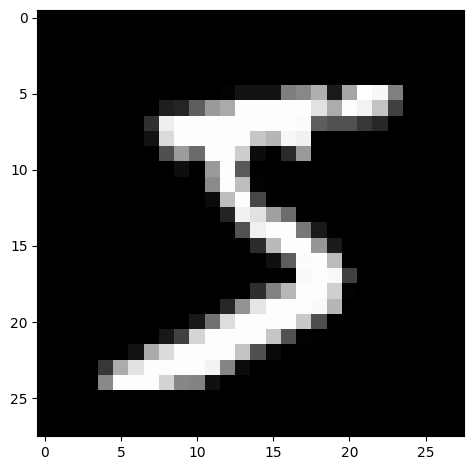

In [6]:
# Get a random sample
random_image = X_train[0]

# Display it
imshow(random_image)

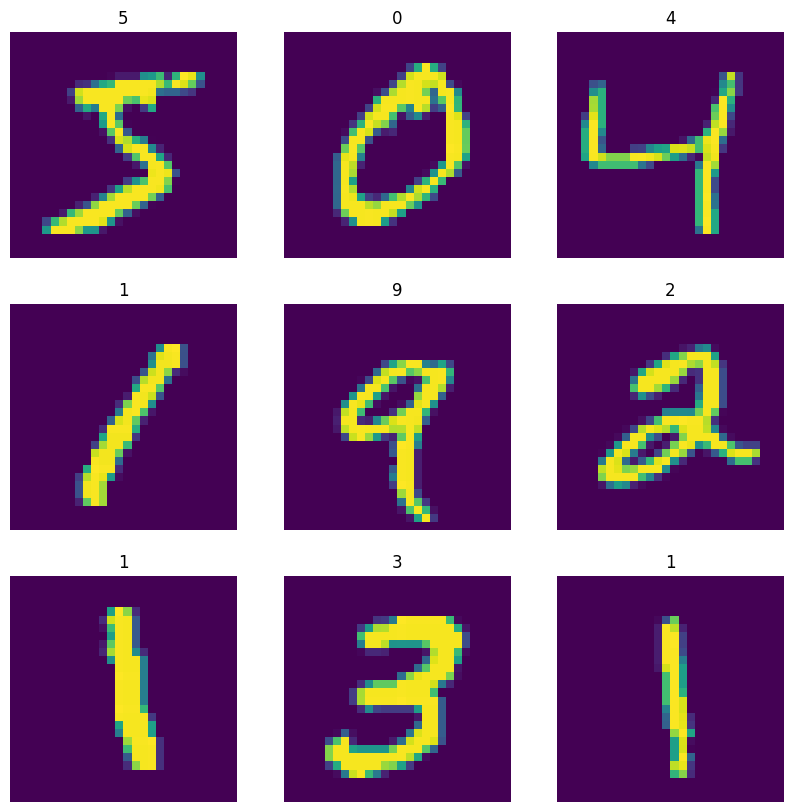

In [7]:
# Define the size of the figure
plt.figure(figsize=(10, 10))

for i in range(9):
  ax = plt.subplot(3, 3, i + 1)

  # Get a sample at index i
  an_image = X_train[i]

  # Display the sample
  plt.imshow(an_image)

  # Display the label of the sample as title
  plt.title(int(y_train[i]))

  plt.axis("off")

# Reshape and Flatten data

In [8]:
print("Shape of Training Data: ", X_train.shape)

print("Shape of a Training sample: ", X_train[0].shape)

# Get a sample image
an_image = X_train[0]

print("Shape of a Sample Image: ", an_image.shape)

# Define new shape and flatten the image
new_shape = 28*28
flattend_an_image = an_image.reshape(new_shape,)

print("Shape of the Flattened Image: ", flattend_an_image.shape)

print("Previous shape of X_train: ", X_train.shape)

# Flatten the whole training data
X_train = X_train.reshape(60000, 784)

print("New shape of X_train: ", X_train.shape)

print("Previous shape of X_test: ", X_test.shape)

# Flatten the whole test data
X_test = X_test.reshape(10000, 784)
print("New shape of X_test: ", X_test.shape)

Shape of Training Data:  (60000, 28, 28)
Shape of a Training sample:  (28, 28)
Shape of a Sample Image:  (28, 28)
Shape of the Flattened Image:  (784,)
Previous shape of X_train:  (60000, 28, 28)
New shape of X_train:  (60000, 784)
Previous shape of X_test:  (10000, 28, 28)
New shape of X_test:  (10000, 784)


# Changing datatype of train and test samples

In [9]:
print("Previous DataType of Train and Test samples:")
print(X_train.dtype)
print(X_test.dtype)

# Change data type of train and test data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print("New DataType of Train and Test samples:")
print(X_train.dtype)
print(X_test.dtype)

Previous DataType of Train and Test samples:
uint8
uint8
New DataType of Train and Test samples:
float32
float32


# Rescaling data

In [10]:
# Get a random sample
a_sample = X_train[0]

print("Min value of sample: ", a_sample.min())
print("Max value of sample: ", a_sample.max())

# Devide each value in Train and Test data by 255
X_train /- 255
X_test /= 255

# Get a sample
a_sample = X_train[0]

print("Min value of sample: ", a_sample.min())
print("Max value of sample: ", a_sample.max())

Min value of sample:  0.0
Max value of sample:  255.0
Min value of sample:  0.0
Max value of sample:  255.0


# Binarize labels

In [11]:
# Display the training lables
y_train

# Shape of training label
y_train.shape

# A random array
input_array = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(input_array)
print("Input array shape: ", input_array.shape)

# Apply to_categorical to the random array
output = to_categorical(input_array, num_classes=10)

print(output)
print("Input list shape: ", input_array.shape)

[0 1 2 3 4 5 6 7 8 9]
Input array shape:  (10,)
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Input list shape:  (10,)


In [12]:
# Apply to_categorical to train labels
Y_train = to_categorical(y_train, nb_classes)

# Apply to_categorical to test labels
Y_test = to_categorical(y_test, nb_classes)

# Define Model

In [13]:
# Multilayer Perceptron model

# We want to create a sequentially stacked model using Keras Sequential API
model = Sequential()

# Set up input layer
model.add(Input(shape=(784,)))

# 1st layer in the model to receive inputs
model.add(Dense(784, activation='relu'))

# Hidden layer
model.add(Dense(625, activation='relu'))

# Output layer
model.add(Dense(10, activation='softmax'))

# Compile Model

In [14]:
# Choose learning rate
learning_rate=0.001

# Select optimizer
optimizer=SGD(learning_rate = learning_rate)

# Select loss function
loss='categorical_crossentropy'

# Select evaluation metrics
metrics=['accuracy']

# Model compilation
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Visualize Model

In [15]:
# A summary input,output and each layers of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 625)               490625    
                                                                 
 dense_2 (Dense)             (None, 10)                6260      
                                                                 
Total params: 1112325 (4.24 MB)
Trainable params: 1112325 (4.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Formula: inputs * outputs + bias
Params in 1st layer:
inputs = 784,
outputs = 784
bias = 784
Totalparam = 784 * 784 +784 = 615440

Params in hidden layer:
inputs = 784,
outputs = 625,
bias = 625
Totalparam = 784 * 625 + 625 = 490625

Params in output layer:
inputs = 625,
outputs = 10.
bias =10
Totalparam=625*10+10 = 6260

Total trainable params:
615440 + 490625 + 6260 = 1112325

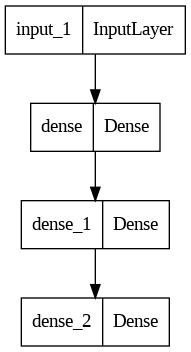

In [16]:
plot_model(model)

# Training the model

In [17]:
# Train
history = model.fit(X_train, Y_train, epochs=nb_epoch, batch_size=batch_size)

Epoch 1/10
469/469 [==============================] - 21s 43ms/step - loss: 3.0616 - accuracy: 0.8871
Epoch 2/10
469/469 [==============================] - 17s 36ms/step - loss: 0.3613 - accuracy: 0.9494
Epoch 3/10
469/469 [==============================] - 11s 24ms/step - loss: 0.1704 - accuracy: 0.9695
Epoch 4/10
469/469 [==============================] - 11s 24ms/step - loss: 0.0890 - accuracy: 0.9808
Epoch 5/10
469/469 [==============================] - 11s 24ms/step - loss: 0.0435 - accuracy: 0.9899
Epoch 6/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0226 - accuracy: 0.9944
Epoch 7/10
469/469 [==============================] - 11s 24ms/step - loss: 0.0113 - accuracy: 0.9974
Epoch 8/10
469/469 [==============================] - 10s 22ms/step - loss: 0.0053 - accuracy: 0.9991
Epoch 9/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0028 - accuracy: 0.9998
Epoch 10/10
469/469 [==============================] - 11s 24ms/step - loss: 0.001

# Inference on Test data

In [18]:
# Evaluate
evaluation = model.evaluate(X_test, Y_test)

# Display test statistics
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0]*100, evaluation[1]*100))

313/313 [==============================] - 2s 6ms/step - loss: 2.1522 - accuracy: 0.9528
Summary: Loss over the test dataset: 215.22, Accuracy: 95.28


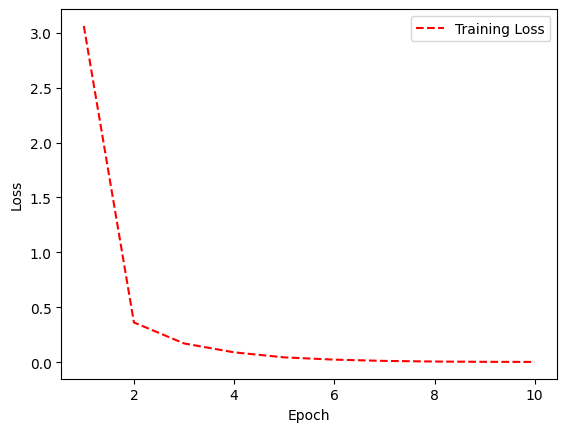

In [19]:
# Get training loss histories
training_loss = history.history['loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

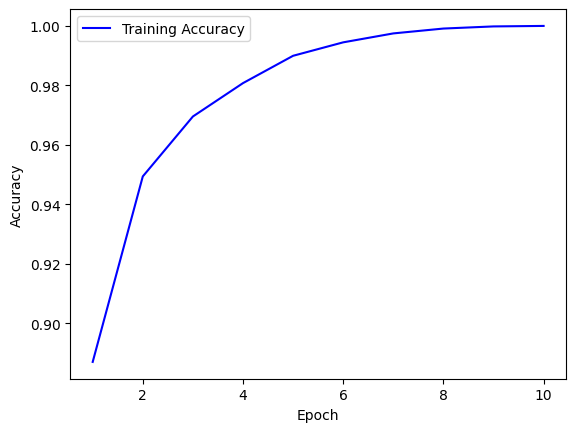

In [20]:
# Get training accuracy histories
training_accuracy = history.history['accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_accuracy, 'b-')
plt.legend(['Training Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();